In [2]:
import numpy as np
import pandas as pd
from geopy import Nominatim
import geopy
import geopandas
import time

import gmaps
import gmaps.datasets

from env import host, user, password, gmaps_api

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('df_with_latlong.csv')
df.head()

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,comments,actions,watershed,unit_id,unit_id2,discharge_to,discharge_route,council_district,month,year,week,earz_zone,pipe_diam,pipe_len,pipe_type,inst_year,inches_no,rainfall_last3,spill_address_full,num_spills_recorded,num_spills_24mos,prevspill_24mos,unit_type,asset_type,last_cleaned,response_time,response_dttm,public_notice,root_cause,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,country_address,location,lat_long
0,6582,2019-03-10 00:00:00,3200,THOUSAND OAKS DR,2100,2100.0,2019-03-10 13:16:00,2019-03-10 14:40:00,1.400000,Grease,Spill ContainedReturned to SystemArea Cleaned ...,CLEANED MAIN,SALADO CREEK,66918,66917,STREET,None,NaN,3,2019,11,0.0,8.0,16.55,PVC,1997.0,NaN,NaN,3200 THOUSAND OAKS DR,1,1.0,0,GRAVITY,Sewer Main,NaN,27.0,2019-03-10 13:43:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"3200 THOUSAND OAKS DR, San Antonio, Texas, USA","3200, Thousand Oaks Drive, Horseshoe Bend, Los...","30.2659455, -97.80399402173913"
1,6583,2019-03-10 00:00:00,6804,S FLORES ST,80,0.0,2019-03-10 14:25:00,2019-03-10 15:45:00,1.333333,Grease,Spill ContainedArea Cleaned and Disinfected,CLEANED MAIN,DOS RIOS,24250,24193,STORMDRAIN,None,3.0,3,2019,11,0.0,8.0,157.00,PVC,1988.0,NaN,NaN,6804 S FLORES,1,1.0,0,GRAVITY,Sewer Main,NaN,65.0,2019-03-10 15:30:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"6804 S FLORES, San Antonio, Texas, USA","Flores, West Odessa, Ector County, Texas, Unit...","31.8547839, -102.5017913"
2,6581,2019-03-09 00:00:00,215,AUDREY ALENE DR,79,0.0,2019-03-09 18:00:00,2019-03-09 19:30:00,1.500000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,DOS RIOS,2822,3351,ALLEY,None,1.0,3,2019,10,0.0,8.0,350.00,CP,1955.0,NaN,NaN,215 Audrey Alene Dr,1,1.0,0,GRAVITY,Sewer Main,NaN,60.0,2019-03-09 19:00:00,False,NaN,1.15,69.0,0.0,0.0,NaN,"215 Audrey Alene Dr, San Antonio, Texas, USA","215, Audrey Alene Drive, San Antonio, Bexar Co...","29.503348142857142, -98.50358214285714"
3,6584,2019-03-09 00:00:00,3602,SE MILITARY DR,83,0.0,2019-03-09 15:37:00,2019-03-09 17:00:00,1.383333,Grease,Spill ContainedArea Cleaned and DisinfectedFlu...,NaN,SALADO CREEK,92804,92805,EASEMENT,None,3.0,3,2019,10,0.0,8.0,213.91,PVC,1983.0,NaN,NaN,3602 SE MILITARY DR,1,1.0,0,GRAVITY,Sewer Main,NaN,33.0,2019-03-09 16:10:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"3602 SE MILITARY DR, San Antonio, Texas, USA","Quality Suites, Southeast Military Drive, Hill...","29.352909500000003, -98.4253423"
4,6580,2019-03-06 00:00:00,100,PANSY LN,75,0.0,2019-03-06 09:40:00,2019-03-06 09:55:00,0.250000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,SALADO CREEK,61141,49543,STREET,None,2.0,3,2019,10,0.0,12.0,291.90,CP,1952.0,NaN,NaN,100 PANSY LN,2,2.0,2018-12-15 00:00:00,GRAVITY,Sewer Main,NaN,0.0,2019-03-06 09:40:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"100 PANSY LN, San Antonio, Texas, USA","Pansy Lane, San Antonio, Bexar County, Texas, ...","29.488062, -98.435963"


In [3]:
df = pd.concat([df, df['lat_long'].str.split(', ', expand=True)], axis=1)

In [4]:
df = df.dropna(subset=[1])

In [5]:
df = df.astype({0: 'float'})

In [6]:
df = df.astype({1: 'float'})

In [7]:
df.rename(columns={0: "Latitude", 1: "Longitude"}, inplace=True)

In [10]:
# Fun visual using lat and long

#gmaps.configure(api_key= # API key in env file to clear all watermarks, if you recreate you'll have watermarks

fig = gmaps.Map(layout={'width': '1000px', 'height': '400px', 'padding': '10px'})
heatmap_layer = gmaps.heatmap_layer(df[['Latitude', 'Longitude']], weights=df['total_gal'])
fig.add_layer(heatmap_layer)

fig

Map(configuration={'api_key': None}, data_bounds=[(24.981928528069208, -123.293471857888), (35.07206444987506,…

In [ ]:
df.total_gal.value_counts()

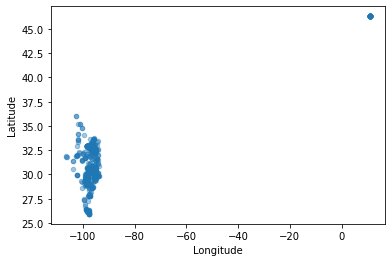

In [12]:
import matplotlib.pyplot as plt
df.plot(kind="scatter", x='Longitude', y='Latitude', alpha=0.4)
plt.show()

In [13]:
df

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,comments,actions,watershed,unit_id,unit_id2,discharge_to,discharge_route,council_district,month,year,week,earz_zone,pipe_diam,pipe_len,pipe_type,inst_year,inches_no,rainfall_last3,spill_address_full,num_spills_recorded,num_spills_24mos,prevspill_24mos,unit_type,asset_type,last_cleaned,response_time,response_dttm,public_notice,root_cause,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,country_address,location,lat_long,Latitude,Longitude
0,6582,2019-03-10 00:00:00,3200,THOUSAND OAKS DR,2100,2100.0,2019-03-10 13:16:00,2019-03-10 14:40:00,1.400000,Grease,Spill ContainedReturned to SystemArea Cleaned ...,CLEANED MAIN,SALADO CREEK,66918,66917,STREET,None,NaN,3,2019,11,0.0,8.0,16.550000,PVC,1997.0,NaN,NaN,3200 THOUSAND OAKS DR,1,1.0,0,GRAVITY,Sewer Main,NaN,27.0,2019-03-10 13:43:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"3200 THOUSAND OAKS DR, San Antonio, Texas, USA","3200, Thousand Oaks Drive, Horseshoe Bend, Los...","30.2659455, -97.80399402173913",30.265946,-97.803994
1,6583,2019-03-10 00:00:00,6804,S FLORES ST,80,0.0,2019-03-10 14:25:00,2019-03-10 15:45:00,1.333333,Grease,Spill ContainedArea Cleaned and Disinfected,CLEANED MAIN,DOS RIOS,24250,24193,STORMDRAIN,None,3.0,3,2019,11,0.0,8.0,157.000000,PVC,1988.0,NaN,NaN,6804 S FLORES,1,1.0,0,GRAVITY,Sewer Main,NaN,65.0,2019-03-10 15:30:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"6804 S FLORES, San Antonio, Texas, USA","Flores, West Odessa, Ector County, Texas, Unit...","31.8547839, -102.5017913",31.854784,-102.501791
2,6581,2019-03-09 00:00:00,215,AUDREY ALENE DR,79,0.0,2019-03-09 18:00:00,2019-03-09 19:30:00,1.500000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,DOS RIOS,2822,3351,ALLEY,None,1.0,3,2019,10,0.0,8.0,350.000000,CP,1955.0,NaN,NaN,215 Audrey Alene Dr,1,1.0,0,GRAVITY,Sewer Main,NaN,60.0,2019-03-09 19:00:00,False,NaN,1.15,69.0,0.0,0.0,NaN,"215 Audrey Alene Dr, San Antonio, Texas, USA","215, Audrey Alene Drive, San Antonio, Bexar Co...","29.503348142857142, -98.50358214285714",29.503348,-98.503582
3,6584,2019-03-09 00:00:00,3602,SE MILITARY DR,83,0.0,2019-03-09 15:37:00,2019-03-09 17:00:00,1.383333,Grease,Spill ContainedArea Cleaned and DisinfectedFlu...,NaN,SALADO CREEK,92804,92805,EASEMENT,None,3.0,3,2019,10,0.0,8.0,213.910000,PVC,1983.0,NaN,NaN,3602 SE MILITARY DR,1,1.0,0,GRAVITY,Sewer Main,NaN,33.0,2019-03-09 16:10:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"3602 SE MILITARY DR, San Antonio, Texas, USA","Quality Suites, Southeast Military Drive, Hill...","29.352909500000003, -98.4253423",29.352910,-98.425342
4,6580,2019-03-06 00:00:00,100,PANSY LN,75,0.0,2019-03-06 09:40:00,2019-03-06 09:55:00,0.250000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,SALADO CREEK,61141,49543,STREET,None,2.0,3,2019,10,0.0,12.0,291.900000,CP,1952.0,NaN,NaN,100 PANSY LN,2,2.0,2018-12-15 00:00:00,GRAVITY,Sewer Main,NaN,0.0,2019-03-06 09:40:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"100 PANSY LN, San Antonio, Texas, USA","Pansy Lane, San Antonio, Bexar County, Texas, ...","29.488062, -98.435963",29.488062,-98.435963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,370,2009-01-06 00:00:00,101,LINDELL PLACE,1000,NaN,2009-01-06 18:00:00,2009-01-06 18:30:00,0.500000,Break In Main,REPLACE PIPE,APPLIED HTH,DOS RIOS,45478,30638,GROUND,NaN,1.0,1,2009,2,NaN,8.0,62.000000,VCP,1968.0,NaN,NaN,LINDELL PLACE 00101,2,1.0,2008-02-10 00:00:00,GRAVITY,Sewer Main,NaN,NaN,NaN,False,structural,0.00,0.0,0.0,0.0,NaN,"LINDELL PLACE 00101, San Antonio, Texas, USA","Lindell Place, River Road, San Antonio, Bexar ...","29.453319, -98.480676",29.453319,-98.480676
3178,371,2009-01-06 00:00:00,2383,LOOP 410 NE,2000,NaN,2009-01-06 12:00:00,2009-01-06 13:00:00,1.000000,Debris/Rock,CLEANED MAIN,APPLIED HTH,SALADO CREEK,46343,59920,DRAINAGE CULVERT,NaN,10.0,

In [14]:
df.loc[df['country_address'].isin('San Antonio')]

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [str]

In [15]:
df = df[df['location'].str.contains("San Antonio")]

In [16]:
df

,sso_id,report_date,spill_address_num,spill_st_name,total_gal,gals_ret,spill_start,spill_stop,hrs,cause,comments,actions,watershed,unit_id,unit_id2,discharge_to,discharge_route,council_district,month,year,week,earz_zone,pipe_diam,pipe_len,pipe_type,inst_year,inches_no,rainfall_last3,spill_address_full,num_spills_recorded,num_spills_24mos,prevspill_24mos,unit_type,asset_type,last_cleaned,response_time,response_dttm,public_notice,root_cause,hrs_2,gal_2,hrs_3,gal_3,days_since_cleaned,country_address,location,lat_long,Latitude,Longitude
2,6581,2019-03-09 00:00:00,215,AUDREY ALENE DR,79,0.0,2019-03-09 18:00:00,2019-03-09 19:30:00,1.500000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,DOS RIOS,2822,3351,ALLEY,None,1.0,3,2019,10,0.0,8.0,350.00,CP,1955.0,NaN,NaN,215 Audrey Alene Dr,1,1.0,0,GRAVITY,Sewer Main,NaN,60.0,2019-03-09 19:00:00,False,NaN,1.15,69.0,0.0,0.0,NaN,"215 Audrey Alene Dr, San Antonio, Texas, USA","215, Audrey Alene Drive, San Antonio, Bexar Co...","29.503348142857142, -98.50358214285714",29.503348,-98.503582
3,6584,2019-03-09 00:00:00,3602,SE MILITARY DR,83,0.0,2019-03-09 15:37:00,2019-03-09 17:00:00,1.383333,Grease,Spill ContainedArea Cleaned and DisinfectedFlu...,NaN,SALADO CREEK,92804,92805,EASEMENT,None,3.0,3,2019,10,0.0,8.0,213.91,PVC,1983.0,NaN,NaN,3602 SE MILITARY DR,1,1.0,0,GRAVITY,Sewer Main,NaN,33.0,2019-03-09 16:10:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"3602 SE MILITARY DR, San Antonio, Texas, USA","Quality Suites, Southeast Military Drive, Hill...","29.352909500000003, -98.4253423",29.352910,-98.425342
4,6580,2019-03-06 00:00:00,100,PANSY LN,75,0.0,2019-03-06 09:40:00,2019-03-06 09:55:00,0.250000,Structural,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,SALADO CREEK,61141,49543,STREET,None,2.0,3,2019,10,0.0,12.0,291.90,CP,1952.0,NaN,NaN,100 PANSY LN,2,2.0,2018-12-15 00:00:00,GRAVITY,Sewer Main,NaN,0.0,2019-03-06 09:40:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"100 PANSY LN, San Antonio, Texas, USA","Pansy Lane, San Antonio, Bexar County, Texas, ...","29.488062, -98.435963",29.488062,-98.435963
5,6579,2019-03-05 00:00:00,3200,S HACKBERRY ST,250,0.0,2019-03-05 14:22:00,2019-03-05 14:32:00,0.166667,Grease,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,DOS RIOS,38907,26117,STREET,None,3.0,3,2019,10,0.0,8.0,315.00,RL,1992.0,NaN,NaN,3200 S Hackberry St,2,2.0,2017-04-11 00:00:00,GRAVITY,Sewer Main,NaN,0.0,2019-03-05 14:22:00,False,NaN,0.00,0.0,0.0,0.0,NaN,"3200 S Hackberry St, San Antonio, Texas, USA","3200, South Hackberry Street, Denver Heights, ...","29.38492, -98.473401",29.384920,-98.473401
6,6577,2019-03-02 00:00:00,9910,SUGARLOAF DR,73,0.0,2019-03-02 13:42:00,2019-03-02 14:55:00,1.216667,Grease,Spill ContainedArea Cleaned and DisinfectedFlu...,CLEANED MAIN,MEDIO CREEK,85120,85363,DRAINAGE CULVERT,None,4.0,3,2019,9,0.0,8.0,264.47,PVC,1985.0,NaN,NaN,9910 Sugarloaf Dr,1,1.0,0,GRAVITY,Sewer Main,NaN,43.8,2019-03-02 14:26:00,False,grease,0.00,0.0,0.0,0.0,NaN,"9910 Sugarloaf Dr, San Antonio, Texas, USA","9910, Sugarloaf Drive, Heritage, Westover Hill...","29.43485231742232, -98.67520884212016",29.434852,-98.675209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,222,2009-01-13 00:00:00,2802,LASSES,50,NaN,2009-01-13 13:00:00,2009-01-13 13:30:00,0.500000,Debris/Rock,CLEANED MAIN,APPLIED HTH,DOS RIOS,28035,42492,STORMDRAIN,NaN,3.0,1,2009,3,NaN,8.0,285.00,VCP,1956.0,NaN,NaN,LASSES 02802,1,0.0,0,GRAVITY,Sewer Main,NaN,NaN,NaN,False,structural,0.00,0.0,0.0,0.0,NaN,"LASSES 02802, San Antonio, Texas, USA","Lasses Boulevard, San Antonio, Bexar County, T...","29.355558, -98.439423",29.355558,-98.439423
3171,364,2009-01-08 00:00:00,3710,NEER AVE,3000,NaN,2009-01-08 08:30:00,2009-01-08 10:30:00,2.000000,Grease,CLEANED MAIN,APPLIED HTH,DOS RIOS,3070,2386,GROUND,NaN,1.0,1,2009,2,NaN,8.0,189.00,CT,1950.0,NaN,NaN,NEER AVE 0371

In [17]:
fig = gmaps.Map(layout={'width': '1000px', 'height': '400px', 'padding': '10px'})
heatmap_layer = gmaps.heatmap_layer(df[['Latitude', 'Longitude']], weights=df['total_gal'])
fig.add_layer(heatmap_layer)

fig

Map(configuration={'api_key': None}, data_bounds=[(29.311140855753457, -98.6708264435918), (29.592637684454203…

<Figure size 1152x648 with 0 Axes>

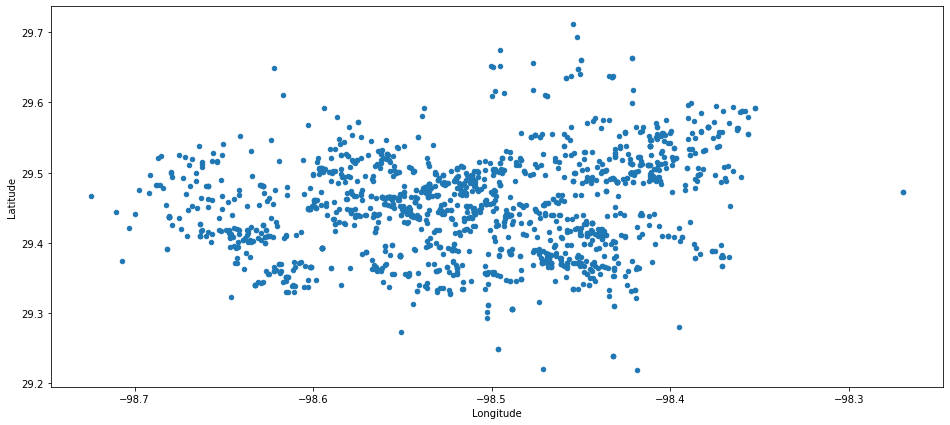

In [25]:
plt.figure(figsize=(16,9))
df.plot(kind="scatter", x='Longitude', y='Latitude', figsize=(16,7))
plt.show()

No handles with labels found to put in legend.


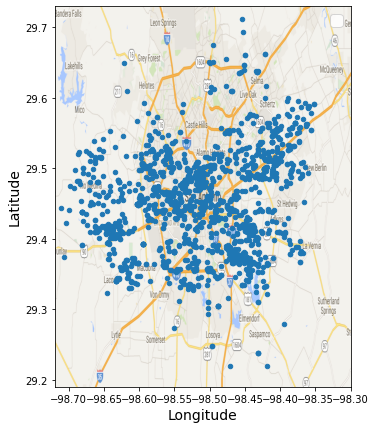

In [31]:
import numpy as np
import matplotlib.image as mpimg
san_antonio_img=mpimg.imread('san_antonio.png')
ax = df.plot(kind="scatter", x='Longitude', y='Latitude', figsize=(16,7))

plt.imshow(san_antonio_img, extent=[-98.72, -98.3, 29.19, 29.73], alpha=0.8)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)


plt.legend(fontsize=16)
plt.show()

In [ ]:
df.council_district.value_counts()

In [33]:
df = df.round({0: 3})

In [34]:
df = df.round({1: 3})

In [ ]:
df[0].value_counts()

In [35]:
df.to_csv("tableau_try.csv")

In [ ]:
san_antonio_img=mpimg.imread('san_antonio.png')
ax = df.plot(kind="scatter", x=0, y=1, alpha=0.9, figsize=(16,9))

plt.imshow(san_antonio_img, extent=[29.19, 29.73, -98.72, -98.3], alpha=0.8)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)


plt.legend(fontsize=16)
plt.show()

In [ ]:
df

In [ ]:
df[0].value_counts()

In [ ]:
df.rename(columns={0: "Latitude", 1: "Longitude"}, inplace=True)

In [ ]:
df

In [32]:
df.to_csv("tableau_try.csv")

In [3]:
df1 = pd.read_csv('sso-geocoded.csv')

In [5]:
df1.drop(columns='Unnamed: 0')

,report_date,total_gallons,gallons_returned,spill_start,spill_stop,hours,cause,actions,watershed,unit_id_1,unit_id_2,discharge_to,discharge_route,council_district,month,year,week,edwards_zone,pipe_diameter,pipe_length,pipe_type,installation_year,inches_no,rainfall_less_3,num_spills_compkey,num_spills_24mos,unit_type,asset_type,last_cleaned,response_time,response_datetime,public_notice,time_int,root_cause,steps_to_prevent,spill_street_address,multiple_spills,counts,months_since_cleaned,zip,lat,long
0,2019-03-10,2100,2100.0,3/10/2019 1:16:00 PM,3/10/2019 2:40:00 PM,1.400000,grease,cleaned main,salado creek,66918,66917,street,none,0,3,2019,11,0,8.0,16.550000,pvc,1997,0.0,0.0,1,1,gravity,sewer main,NaN,0.45,2019-03-10,False,24,na,na,3200 Thousand Oaks Dr,False,1,0.0,78247-3317,29.572974,-98.436752
1,2019-03-10,80,0.0,3/10/2019 2:25:00 PM,3/10/2019 3:45:00 PM,1.333333,grease,cleaned main,dos rios,24250,24193,stormdrain,none,3,3,2019,11,0,8.0,157.000000,pvc,1988,0.0,0.0,1,1,gravity,sewer main,NaN,1.08,2019-03-10,False,120,na,na,6804 S Flores St,False,1,0.0,78221-1902,29.352534,-98.489222
2,2019-03-09,79,0.0,3/9/2019 6:00:00 PM,3/9/2019 7:30:00 PM,1.500000,structural,cleaned main,dos rios,2822,3351,alley,none,1,3,2019,10,0,8.0,350.000000,cp,1955,0.0,0.0,1,1,gravity,sewer main,NaN,1.00,2019-03-09,False,24,na,na,215 Audrey Alene Dr,True,1,0.0,78216-6610,29.503260,-98.503986
3,2019-03-09,83,0.0,3/9/2019 3:37:00 PM,3/9/2019 5:00:00 PM,1.383333,grease,na,salado creek,92804,92805,easement,none,3,3,2019,10,0,8.0,213.910000,pvc,1983,0.0,0.0,1,1,gravity,sewer main,NaN,0.55,2019-03-09,False,120,na,na,3602 Se Military Dr,False,1,0.0,78223-4582,29.353559,-98.425234
4,2019-03-06,75,0.0,3/6/2019 9:40:00 AM,3/6/2019 9:55:00 AM,0.250000,structural,cleaned main,salado creek,61141,49543,street,none,2,3,2019,10,0,12.0,291.900000,cp,1952,0.0,0.0,2,2,gravity,sewer main,NaN,0.00,2019-03-06,False,3,na,na,100 Pansy Ln,False,1,0.0,78209,29.487718,-98.435759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,2009-01-07,1000,0.0,1/7/2009 6:30:00 PM,1/7/2009 8:00:00 PM,1.500000,debris/rock,applie hth,dos rios,16104,16216,stormdrain,na,7,1,2009,2,0,8.0,437.000000,ct,1946,0.0,0.0,5,0,gravity,sewer main,NaN,0.0,NaN,False,0,structural,na,1300 General Mcmullen N,False,1,0.0,78228-5207,29.452097,-98.551240
7309,2009-01-06,2000,0.0,1/6/2009 12:00:00 PM,1/6/2009 1:00:00 PM,1.000000,debris/rock,applied hth,salado creek,46343,59920,drainage culvert,na,10,1,2009,2,0,8.0,400.000000,vcp,1966,0.0,0.0,1,0,gravity,sewer main,NaN,0.0,NaN,False,0,structural,na,2383 Loop 410 Ne,False,1,0.0,78217-5602,29.516318,-98.420186
7310,2009-01-05,800,0.0,1/5/2009 2:00:00 PM,1/5/2009 4:00:00 PM,2.000000,rags,applied hth,leon creek,89038,74015,street,na,7,1,2009,2,0,8.0,151.877494,vcp,1976,0.0,0.0,2,0,gravity,sewer main,NaN,0.0,NaN,False,0,structural,na,7407 Elderberry,False,1,0.0,78240-3700,29.521403,-98.629796
7311,2009-01-05,400,0.0,1/5/2009 11:00:00 AM,1/5/2009 11:45:00 AM,0.750000,rags,applied hth,leon creek,51874,51883,drainage culvert,na,8,1,2009,2,0,8.0,380.870000,vcp,1958,0.0,0.0,1,0,gravity,sewer main,NaN,0.0,NaN,False,0,debris,na,7019 Baywater,False,1,0.0,78229-5047,29.498328,-98.577360
